In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load Dataset

In [40]:
X_train = np.loadtxt('E:/My/Image Classification/input.csv', delimiter=',')
Y_train = np.loadtxt('E:/My/Image Classification/labels.csv', delimiter=',')

X_test = np.loadtxt('E:/My/Image Classification/input_test.csv', delimiter=',')
Y_test = np.loadtxt('E:/My/Image Classification/labels_test.csv', delimiter=',')


In [41]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [42]:
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


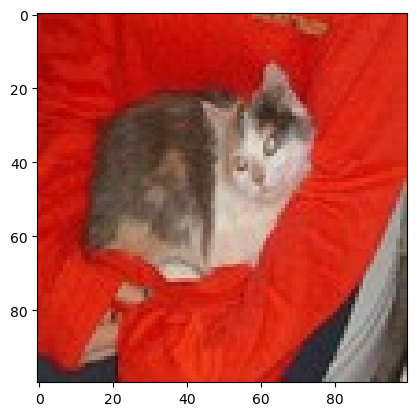

In [88]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model

In [93]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

## model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [98]:
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])

In [102]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.7991 - loss: 0.4461
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.8229 - loss: 0.3975
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.8519 - loss: 0.3479
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.8679 - loss: 0.3167
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9003 - loss: 0.2575
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.9159 - loss: 0.2204
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9460 - loss: 0.1766
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.9504 - loss: 0.1599
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.9680 - loss: 0.1131
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9729 - loss: 0.0991


In [104]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6633 - loss: 1.0914


[1.0421233177185059, 0.6700000166893005]

## Making predictions

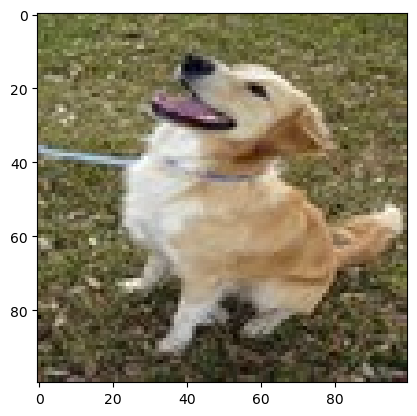

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model Predict it is a : dog


In [134]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Model Predict it is a :",pred)